In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x26d9d6217c0>)

In [15]:
train_df = pd.read_csv(r"C:\\Users\USER\Desktop\move/ratings_train.txt", "\t")
test_df = pd.read_csv(r"C:\Users\USER\Desktop\move/ratings_test.txt", "\t")






In [4]:
from konlpy.tag import Okt
okt = Okt()
okt.pos(u'비가오는 날에  난 항상 그리워해 ')


[('비가오는', 'Verb'),
 ('날', 'Noun'),
 ('에', 'Josa'),
 ('난', 'Noun'),
 ('항상', 'Noun'),
 ('그리워해', 'Adjective')]

In [16]:
def tokenize(doc):
    #형태소와 품사를 join
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]


In [17]:
train_df.isnull().any() #document에 null값이 있다.
train_df['document'] = train_df['document'].fillna(''); #null값을 ''값으로 대체

test_df.isnull().any()
test_df['document'] = test_df['document'].fillna(''); #null값을 ''값으로 대체


In [22]:
#tokenize 과정은 시간이 오래 걸릴수 있음...
train_docs = [(tokenize(row[1]), row[2]) for row in train_df.values]
test_docs = [(tokenize(row[1]), row[2]) for row in test_df.values]


In [23]:
print(train_docs[0])
print(test_docs[0])


(['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun'], 0)
(['굳다/Adjective', 'ㅋ/KoreanParticle'], 1)


In [24]:
tokens = [t for d in train_docs for t in d[0]]
print("토큰개수:", len(tokens))


토큰개수: 2159921


In [27]:
import nltk
text = nltk.Text(tokens, name='NMSC')

#토큰개수
print(len(text.tokens))

#중복을 제외한 토큰개수
print(len(set(text.tokens)))

#출력빈도가 높은 상위 토큰 10개
print(text.vocab().most_common(10))


2159921
49894
[('./Punctuation', 67778), ('영화/Noun', 50818), ('하다/Verb', 41209), ('이/Josa', 38540), ('보다/Verb', 38538), ('의/Josa', 30188), ('../Punctuation', 29055), ('가/Josa', 26627), ('에/Josa', 26468), ('을/Josa', 23118)]


In [29]:
%matplotlib inline


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48372 missing from current font.
  f

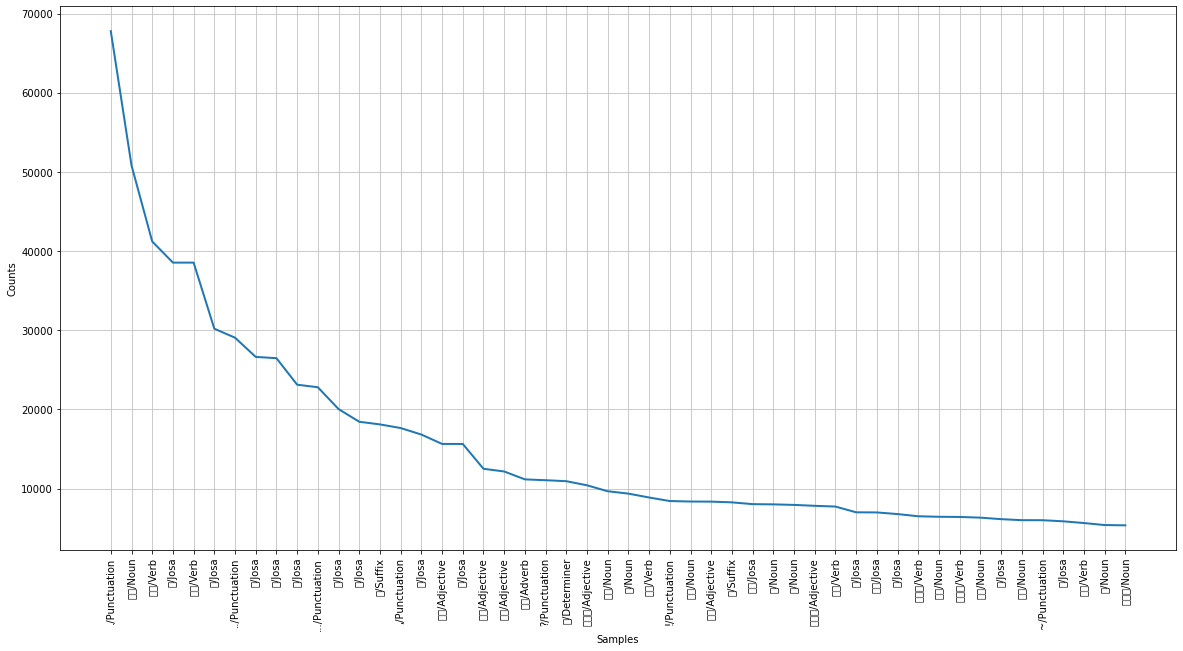

In [30]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
text.plot(50)


In [31]:
FREQUENCY_COUNT = 1000; #시간적 여유가 있다면 10000개를 해보도록~


In [32]:
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]


In [33]:
#단어리스트 문서에서 상위 10000개들중 포함되는 단어들이 개수
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]


In [34]:
#문서에 들어가는 단어 개수
x_train = [term_frequency(d) for d,_ in train_docs]
x_test = [term_frequency(d) for d,_ in test_docs]

In [35]:
#라벨(1 or 0)
y_train = [c for _,c in train_docs]
y_test = [c for _,c in test_docs]


In [36]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [37]:
import tensorflow as tf

#레이어 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [38]:
#학습 프로세스 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )


In [39]:
#학습 데이터로 학습
model.fit(x_train, y_train, epochs=10, batch_size=512)


Epoch 1/10
293/293 [==============================] - 2s 3ms/step - loss: 0.4929 - binary_accuracy: 0.7690
Epoch 2/10
293/293 [==============================] - 1s 3ms/step - loss: 0.3839 - binary_accuracy: 0.8237
Epoch 3/10
293/293 [==============================] - 1s 3ms/step - loss: 0.3641 - binary_accuracy: 0.8340
Epoch 4/10
293/293 [==============================] - 1s 3ms/step - loss: 0.3516 - binary_accuracy: 0.8416
Epoch 5/10
293/293 [==============================] - 1s 3ms/step - loss: 0.3399 - binary_accuracy: 0.8489
Epoch 6/10
293/293 [==============================] - 1s 3ms/step - loss: 0.3275 - binary_accuracy: 0.8559
Epoch 7/10
293/293 [==============================] - 1s 3ms/step - loss: 0.3140 - binary_accuracy: 0.8626
Epoch 8/10
293/293 [==============================] - 1s 4ms/step - loss: 0.3038 - binary_accuracy: 0.8680
Epoch 9/10
293/293 [==============================] - 1s 3ms/step - loss: 0.2929 - binary_accuracy: 0.8757
Epoch 10/10
293/293 [================

In [40]:
results = model.evaluate(x_test, y_test)


1563/1563 [==============================] - 1s 537us/step - loss: 0.3989 - binary_accuracy: 0.8257


In [41]:
#loss: 0.5, acc: 0.7
results


[0.39887571334838867, 0.8256800174713135]

In [42]:

model.save('movie_review_model.h7')

# 모델 불러오기
#from keras.models import load_model
#model = load_model('movie_review_model.h5')


INFO:tensorflow:Assets written to: movie_review_model.h7\assets


In [43]:
review = "아주 재미 있어요"
token = tokenize(review)
token


['아주/Noun', '재미/Noun', '있다/Adjective']

In [44]:
tf = term_frequency(token)


In [45]:
data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)


In [46]:
float(model.predict(data))


0.9644958972930908

In [47]:
def predict_review(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print(f"{review} ==> 긍정 ({round(score*100)}%)")
    else:
        print(f"{review} ==> 부정 ({round((1-score)*100)}%)")
        

In [48]:
predict_review("재미 정말 없어요")


재미 정말 없어요 ==> 부정 (98%)


In [49]:
predict_review("실제 관람객입니다. 컨저링이나 에나벨 인시디어스 통틀어서 이번 영화가 인상이 제일 강렬하게 남았고 완성도가 높았습니다. 워렌부부가 나오는 다른편을 보셨던 분들은 굉장히 재미있게 볼거라 확신합니다. 그리고 네이버에서는 실제로 관람한 사람만 평을 적을 수있게 시스템을 업데이트 해줬으면 좋겠습니다. 영화관영수증 같은 인증방법으로 해서 올바른 평점 평론을 받아들여야지.. 이거 뭐 개판도 아니고 .. 몇년전까지만 해도 이정도는 아니였는데.. 평점이 하도 낮길래 .. 설마설마 했는데 역시였네요. 평점조작 좀 그만 합시다 ")


실제 관람객입니다. 컨저링이나 에나벨 인시디어스 통틀어서 이번 영화가 인상이 제일 강렬하게 남았고 완성도가 높았습니다. 워렌부부가 나오는 다른편을 보셨던 분들은 굉장히 재미있게 볼거라 확신합니다. 그리고 네이버에서는 실제로 관람한 사람만 평을 적을 수있게 시스템을 업데이트 해줬으면 좋겠습니다. 영화관영수증 같은 인증방법으로 해서 올바른 평점 평론을 받아들여야지.. 이거 뭐 개판도 아니고 .. 몇년전까지만 해도 이정도는 아니였는데.. 평점이 하도 낮길래 .. 설마설마 했는데 역시였네요. 평점조작 좀 그만 합시다  ==> 부정 (100%)


In [50]:
predict_review("장면이나 음악이 퀄리티가 좋은 것 같아서 신기해하면서 봄 ")



장면이나 음악이 퀄리티가 좋은 것 같아서 신기해하면서 봄  ==> 긍정 (87%)


In [52]:
predict_review("전 정말 재밌게 봤어요 우리나라 여자 액션연기 중 단연 으뜸 같아요ㅋ 특히 마지막에 위하준씨랑 라미란, 이성경씨 액션씬.. 보는 제가 다 아플정도로 빵빵 때리니 재밌네요ㅋㅋ 위하준씨.. 어디서 봤나 했더니 로맨스는 별책부록에 나온 그 분이시군요.. 악역도 잘어울리네요 더 잘 됐음 좋겠네요 ")


전 정말 재밌게 봤어요 우리나라 여자 액션연기 중 단연 으뜸 같아요ㅋ 특히 마지막에 위하준씨랑 라미란, 이성경씨 액션씬.. 보는 제가 다 아플정도로 빵빵 때리니 재밌네요ㅋㅋ 위하준씨.. 어디서 봤나 했더니 로맨스는 별책부록에 나온 그 분이시군요.. 악역도 잘어울리네요 더 잘 됐음 좋겠네요  ==> 긍정 (100%)


In [53]:
predict_review(" 마지막 결말까지 씁쓸하면서도 긴장감있게 슬펐다 눈내리는 영상미때문에 더 그랬는지도")

 마지막 결말까지 씁쓸하면서도 긴장감있게 슬펐다 눈내리는 영상미때문에 더 그랬는지도 ==> 긍정 (96%)


In [57]:
predict_review("실제 관람객입니다. 컨저링이나 에나벨 인시디어스 통틀어서 이번 영화가 인상이 제일 강렬하게 남았고 완성도가 높았습니다. 워렌부부가 나오는 다른편을 보셨던 분들은 굉장히 재미있게 볼거라 확신합니다. 그리고 네이버에서는 실제로 관람한 사람만 평을 적을 수있게 시스템을 업데이트 해줬으면 좋겠습니다. 영화관영수증 같은 인증방법으로 해서 올바른 평점 평론을 받아들여야지.. 이거 뭐 개판도 아니고 .. 몇년전까지만 해도 이정도는 아니였는데.. 평점이 하도 낮길래 .. 설마설마 했는데 역시였네요. 평점조작 좀 그만 합시다")


실제 관람객입니다. 컨저링이나 에나벨 인시디어스 통틀어서 이번 영화가 인상이 제일 강렬하게 남았고 완성도가 높았습니다. 워렌부부가 나오는 다른편을 보셨던 분들은 굉장히 재미있게 볼거라 확신합니다. 그리고 네이버에서는 실제로 관람한 사람만 평을 적을 수있게 시스템을 업데이트 해줬으면 좋겠습니다. 영화관영수증 같은 인증방법으로 해서 올바른 평점 평론을 받아들여야지.. 이거 뭐 개판도 아니고 .. 몇년전까지만 해도 이정도는 아니였는데.. 평점이 하도 낮길래 .. 설마설마 했는데 역시였네요. 평점조작 좀 그만 합시다 ==> 부정 (100%)


In [58]:
predict_review("다른사람들은 남자가능청스러움에 미워할수없다는매력을느낀다지만 여러번봤을때 깊은의미를많이숨겨놓은거같다 연기에속지말고 숨은요소를보면 감독이전하고싶고 하정우역활의슬픔이보인다 두세번볼수록 더더욱 놓친걸찾는재미가있다")




다른사람들은 남자가능청스러움에 미워할수없다는매력을느낀다지만 여러번봤을때 깊은의미를많이숨겨놓은거같다 연기에속지말고 숨은요소를보면 감독이전하고싶고 하정우역활의슬픔이보인다 두세번볼수록 더더욱 놓친걸찾는재미가있다 ==> 긍정 (100%)


In [59]:
predict_review("진짜 핵~~노잼!!!댓글 알바에 속지 마세요. 한국 공포 영화 기대 안 했지만 하나도 안 무서움. 무서운 거 못보는 친구도 그냥 시시하다고 함")



진짜 핵~~노잼!!!댓글 알바에 속지 마세요. 한국 공포 영화 기대 안 했지만 하나도 안 무서움. 무서운 거 못보는 친구도 그냥 시시하다고 함 ==> 부정 (100%)
